In [56]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), "scripts/analysis/autoencoders"))

In [88]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import itertools
import convolutional

In [130]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from PIL import Image

In [86]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [60]:
model = convolutional.Autoencoder()
model.load_state_dict(state_dict=torch.load("./models/autoencoder.pt"))
model = model.to(device)

In [63]:
dataset = convolutional.HistologyDataset("outdir/split_data/test")
dataloader = DataLoader(
    dataset,
    batch_size=1
)

In [126]:
examples = []
for img, (img_fp, *_) in data:
    with torch.no_grad():
        img_reconstructed, x_latent = model(img.to(device))
    img = img.view(256, 256).cpu()
    img_reconstructed = img_reconstructed.view(256,256).cpu()
    examples.append((img, img_reconstructed, img_fp))

In [175]:
import torchvision.transforms.functional as TF
bg_color = (244,244,244)
def preproc(img: Image.Image):
    x, y = img.size
    if x > y:
        img = TF.pad(img, (0,x-y), fill=bg_color)
    elif x < y:
        img = TF.pad(img, (y-x,0), fill=bg_color)
    img = TF.resize(img, (2**10, 2**10))
    return img


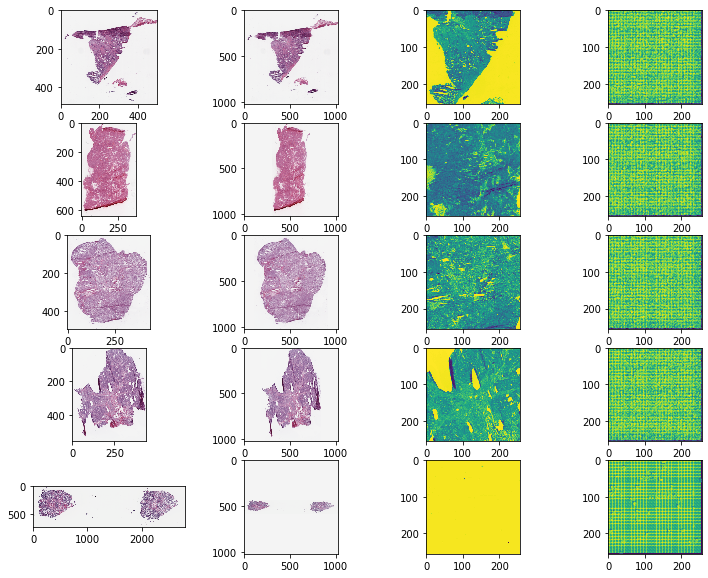

In [176]:
n_examples = 5

f, axes = plt.subplots(n_examples, 4)
for i, (img, img_reconstructed, fp) in enumerate(itertools.islice(examples, n_examples)):
    img_orig = Image.open("outdir/split_data/test/" + fp)
    axes[i, 0].imshow(img_orig)
    axes[i, 1].imshow(preproc(img_orig))
    axes[i, 2].imshow(img)
    axes[i, 3].imshow(img_reconstructed)
    
f.set_size_inches(2.5*n_examples,10)